In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install numpy scipy

In [3]:
pip install bangla

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

**Importing important libraries**

In [5]:
# general library
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
import bangla
import io
import string
%matplotlib inline
#import Wordcloud

# nlp packages
import nltk
# import bnltk
import regex
from nltk import word_tokenize
from collections import Counter
# from bltk.langtools import Tokenizer
# from bnltk.tokenize import Tokenizers
#from wordcloud import WordCloud

#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import tree
import time
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image

#Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier

#Deep learning library
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
# from tensorflow.keras.layers import Dense
from keras.preprocessing.text import Tokenizer

## **Reading dataset**

In [7]:
data_set = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis_29.12.23/Dataset/1.Health_dataset final.csv")
data_set

,Serial,Data,Label
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,REAL
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,REAL
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,REAL
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",REAL
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,FAKE
...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",REAL
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,REAL
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,REAL
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,REAL


## ***Data Pre-Processing***

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_set['Label']= label_encoder.fit_transform(data_set['Label'])
data_set

,Serial,Data,Label
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,1
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,1
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,1
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",1
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,0
...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",1
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,1
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,1
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,1


In [9]:
text_data = data_set.drop('Label' ,axis = 1)
label = data_set['Label']

In [10]:
stopwords = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis_29.12.23/Dataset/0.stopwords_bangla.csv")
stopwords

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [11]:
pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=32e14869119bc7108a7acf5ec519958fde05403b8c37de3df64b617db5e90b6f
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [12]:
bangla_stop_words = [line.strip() for line in stopwords['words']]
punctuation_symbol = re.compile('[/(){}\[\]\|। @,;!``“ ”?#+-_*"%^০-৯1-9]')
from nltk.tokenize import word_tokenize

def remove_pun(text):
    text = punctuation_symbol.sub(' ', text)
    return text
text_data['remove_punct'] = text_data['Data'].apply(lambda x:remove_pun(x))
from bnlp import BasicTokenizer

tokenizer = BasicTokenizer()


text_data['tokenized'] = text_data['remove_punct'].apply(lambda x: tokenizer(x))



def stop(text):
    text =  " ".join([n for n in text if n not in bangla_stop_words ])
    return text
text_data['remove_stopwords'] = text_data['tokenized'].apply(lambda x:stop(x))
text_data

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Serial,Data,remove_punct,tokenized,remove_stopwords
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,এইডস আমাদের দেশে প্রকট নয় তারপরও সাবধানতা অবল...,"[এইডস, আমাদের, দেশে, প্রকট, নয়, তারপরও, সাবধান...",এইডস দেশে প্রকট তারপরও সাবধানতা অবলম্বন জরুরি
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,"[এইডস, সংক্রমিতদের, মধ্যে, রয়েছেন, নারী, ও, পু...",এইডস সংক্রমিতদের রয়েছেন নারী পুরুষ যৌনকর্মী সম...
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,যারা সহজেই সর্দিতে আক্রান্ত হয় বিশেষ করে শিশু...,"[যারা, সহজেই, সর্দিতে, আক্রান্ত, হয়, বিশেষ, কর...",সহজেই সর্দিতে শিশুদের কিছুদিন ফোঁটা মধুর সাথে ...
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",কোকাকোলা পেপসি স্প্রাইট ইত্যাদি কোমল পানীয় ন...,"[কোকাকোলা, পেপসি, স্প্রাইট, ইত্যাদি, কোমল, পান...",কোকাকোলা পেপসি স্প্রাইট কোমল পানীয় নিয়মিত পানক...
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,"[শরীরের, কোন, অংশ, যদি, পুড়ে, যায়, তাহলে, তুলস...",শরীরের পুড়ে যায় তুলসীর রস নারকেলের তেল ফেটিয়ে ...
...,...,...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",পিঠ ঘাড় নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...,"[পিঠ, ঘাড়, নিতম্বে, বিরুপ, প্রভাব, ফেলে, মোটা,...",পিঠ ঘাড় নিতম্বে বিরুপ প্রভাব ফেলে মোটা ওজনের ম...
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে,"[মোটা, মানিব্যাগ, শারীরিক, ভারসাম্য, নষ্ট, করে]",মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,"[মোটা, মানিব্যাগ, পকেটে, থাকা, অবস্থায়, বসে, থ...",মোটা মানিব্যাগ পকেটে অবস্থায় থাকার অভ্যাস শরীর...
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে,"[মোটা, মানিব্যাগে, ওপর, বসে, থাকলে, শিরদাঁড়ায়ও...",মোটা মানিব্যাগে ওপর থাকলে শিরদাঁড়ায়ও চাপ পড়ে


In [13]:
x_data = text_data['remove_stopwords']
x_data

0           এইডস দেশে প্রকট তারপরও সাবধানতা অবলম্বন জরুরি
1       এইডস সংক্রমিতদের রয়েছেন নারী পুরুষ যৌনকর্মী সম...
2       সহজেই সর্দিতে শিশুদের কিছুদিন ফোঁটা মধুর সাথে ...
3       কোকাকোলা পেপসি স্প্রাইট কোমল পানীয় নিয়মিত পানক...
4       শরীরের পুড়ে যায় তুলসীর রস নারকেলের তেল ফেটিয়ে ...
                              ...                        
5033    পিঠ ঘাড় নিতম্বে বিরুপ প্রভাব ফেলে মোটা ওজনের ম...
5034                 মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট
5035    মোটা মানিব্যাগ পকেটে অবস্থায় থাকার অভ্যাস শরীর...
5036         মোটা মানিব্যাগে ওপর থাকলে শিরদাঁড়ায়ও চাপ পড়ে
5037               মোটা মানিব্যাগের কারণে স্নায়ুর সমস্যাও
Name: remove_stopwords, Length: 5038, dtype: object

In [14]:
y = data_set['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

#***Feature extraction***

In [15]:
# ******* Tfidf & count vectorizer *****

count_vectorizer = CountVectorizer(max_features=5500,ngram_range=(2,2))
count_vectorizer.fit_transform(x_data)
count_vectorizer_matrix= count_vectorizer.transform(x_data)
tfidf = TfidfTransformer()
tfidf.fit(count_vectorizer_matrix)
X = tfidf.fit_transform(count_vectorizer_matrix)



**My Own**

In [16]:
dense_matrix = X.toarray()
print(dense_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# labels = sorted_df[["int_overall"]]
labels = data_set[['Label']]
labels.head()

,Label
0,1
1,1
2,1
3,1
4,0


In [18]:
y_graph = labels.to_numpy()
y_graph.shape

(5038, 1)

In [19]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00


In [20]:
import torch
from torch_geometric.data import Data

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(dense_matrix, dense_matrix)


threshold = 0.9  # You can adjust this threshold based on your dataset

# Create edges based on similarity above the threshold
edges = []
num_nodes = dense_matrix.shape[0]

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if similarity_matrix[i, j] > threshold:
            print(similarity_matrix[i, j]);
            edges.append((i, j))

# Convert to PyTorch tensors
x = torch.tensor(dense_matrix, dtype=torch.float32)
edge_index = torch.tensor(list(zip(*edges)), dtype=torch.long)
y = torch.tensor(y_graph, dtype=torch.long)  # Replace with your actual labels

# Calculate the number of nodes
num_nodes = x.size(0)

# Define the ratio for train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

# Calculate the number of nodes for each set
num_train = int(train_ratio * num_nodes)
num_val = int(val_ratio * num_nodes)
num_test = int(test_ratio * num_nodes)

# Create random indices
indices = torch.randperm(num_nodes)

# Create masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign nodes to sets based on the random indices
train_mask[indices[:num_train]] = 1
val_mask[indices[num_train:num_train + num_val]] = 1
test_mask[indices[num_train + num_val:num_train + num_val + num_test]] = 1

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)

# Print the PyTorch Geometric Data object
print(data)



1.0000000000000004
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0000000000000004
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
0.999999999999999

In [21]:
data.y

tensor([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]])

In [22]:
num_classes = torch.unique(data.y).size(0)
print(num_classes)


2


In [23]:
# from collections import Counter
# sorted(Counter(data.y.tolist()).items())


from collections import Counter

# Convert PyTorch tensor to a list of integers
labels_list = [label.item() for label in data.y]

# Use Counter on the list
label_counts = Counter(labels_list)

# Sort the counts
sorted_label_counts = sorted(label_counts.items())

print(sorted_label_counts)

[(0, 2554), (1, 2484)]


**GCN**

In [24]:
from torch_geometric.nn import GCNConv
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels,heads):
        super().__init__()
        torch.manual_seed(12)
        self.conv1 = GCNConv(data.num_features,hidden_channels)
        self.conv2 = GCNConv(hidden_channels,num_classes)

    def forward(self,x,edge_index):
        x = F.dropout(x,p=0.5,training = self.training)
        x = self.conv1(x,edge_index)
        x = F.elu(x)
        x = F.dropout(x,p=0.5,training = self.training)
        x = self.conv2(x,edge_index)
        return x

model = GCN(hidden_channels=32,heads=8)
print(model)

GCN(
  (conv1): GCNConv(5500, 32)
  (conv2): GCNConv(32, 2)
)


In [25]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001, weight_decay = 5e-4)

In [26]:
from sklearn.metrics import classification_report
import numpy as np

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()

    pred = out.argmax(dim=1)
    correct = pred[data.train_mask] == data.y[data.train_mask].squeeze()
    train_acc = int(correct.sum()) / int(data.train_mask.sum())
    return loss.item(), train_acc

def test(mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[mask] == data.y[mask].squeeze()
    acc = int(correct.sum()) / int(mask.sum())
    return acc, pred[mask].cpu().numpy(), data.y[mask].cpu().numpy()

best_test_acc = 0
best_preds = None
best_true = None

for epoch in range(1, 250):
    loss, train_acc = train()
    val_acc, _, _ = test(data.val_mask)
    test_acc, test_preds, test_true = test(data.test_mask)

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_preds = test_preds
        best_true = test_true

    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

# After all epochs, print classification report for the epoch with the best test accuracy
print(f'Best Test Accuracy: {best_test_acc:.4f}')
print(classification_report(best_true, best_preds))


Epoch: 001, Train Acc: 0.5298, Val Acc: 0.5427, Test Acc: 0.5382
Epoch: 002, Train Acc: 0.5584, Val Acc: 0.5845, Test Acc: 0.5789
Epoch: 003, Train Acc: 0.6129, Val Acc: 0.6183, Test Acc: 0.6058
Epoch: 004, Train Acc: 0.6205, Val Acc: 0.6302, Test Acc: 0.6356
Epoch: 005, Train Acc: 0.6520, Val Acc: 0.6541, Test Acc: 0.6524
Epoch: 006, Train Acc: 0.6841, Val Acc: 0.6839, Test Acc: 0.6663
Epoch: 007, Train Acc: 0.7090, Val Acc: 0.6998, Test Acc: 0.6773
Epoch: 008, Train Acc: 0.7368, Val Acc: 0.7177, Test Acc: 0.6912
Epoch: 009, Train Acc: 0.7362, Val Acc: 0.7376, Test Acc: 0.7041
Epoch: 010, Train Acc: 0.7697, Val Acc: 0.7555, Test Acc: 0.7190
Epoch: 011, Train Acc: 0.7853, Val Acc: 0.7614, Test Acc: 0.7339
Epoch: 012, Train Acc: 0.8046, Val Acc: 0.7634, Test Acc: 0.7349
Epoch: 013, Train Acc: 0.8131, Val Acc: 0.7674, Test Acc: 0.7398
Epoch: 014, Train Acc: 0.8244, Val Acc: 0.7654, Test Acc: 0.7428
Epoch: 015, Train Acc: 0.8290, Val Acc: 0.7614, Test Acc: 0.7498
Epoch: 016, Train Acc: 0.

In [27]:
print(f'Best Test Accuracy: {best_test_acc:.4f}')
print(classification_report(best_true, best_preds))

Best Test Accuracy: 0.7984
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       523
           1       0.83      0.73      0.78       484

    accuracy                           0.80      1007
   macro avg       0.80      0.80      0.80      1007
weighted avg       0.80      0.80      0.80      1007



In [28]:
import torch
import numpy as np
from torch_geometric.data import Data
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Assuming GCN model and other necessary imports are defined

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize sum of metrics for each class and accuracies
num_classes = len(np.unique(data.y.numpy()))
precision_sum = np.zeros(num_classes)
recall_sum = np.zeros(num_classes)
f1_sum = np.zeros(num_classes)
support_sum = np.zeros(num_classes)
total_test_acc = 0
total_train_acc = 0
total_val_acc = 0

for fold, (trainval_index, test_index) in enumerate(skf.split(data.x.numpy(), data.y.numpy())):
    train_index, val_index = train_test_split(trainval_index, test_size=0.2, random_state=42)
    # Initialize and split data for the current fold
    data.train_mask[:] = False
    data.val_mask[:] = False
    data.test_mask[:] = False
    data.train_mask[train_index] = True
    data.val_mask[val_index] = True
    data.test_mask[test_index] = True

    model = GCN(hidden_channels=32, heads=8)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

    best_train_acc = 0
    best_val_acc = 0
    best_test_acc = 0
    best_preds = None
    best_true = None

    for epoch in range(1, 250):
        loss, train_acc = train()
        val_acc, _, _ = test(data.val_mask)
        test_acc, test_preds, test_true = test(data.test_mask)

        # Update best accuracies
        if test_acc > best_test_acc:
            best_train_acc = train_acc
            best_val_acc = val_acc
            best_test_acc = test_acc
            best_preds = test_preds
            best_true = test_true

        print(f'Fold: {fold+1}, Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

    print(f'Fold: {fold + 1} Best Accuracies - Train: {best_train_acc:.4f}, Val: {best_val_acc:.4f}, Test: {best_test_acc:.4f}')
    print(classification_report(best_true, best_preds))

    total_train_acc += best_train_acc
    total_val_acc += best_val_acc
    total_test_acc += best_test_acc
    precision, recall, f1, support = precision_recall_fscore_support(best_true, best_preds, average=None, labels=range(num_classes))
    precision_sum += precision
    recall_sum += recall
    f1_sum += f1
    support_sum += support

# Calculate average accuracies and metrics
average_train_acc = total_train_acc / skf.get_n_splits()
average_val_acc = total_val_acc / skf.get_n_splits()
average_test_acc = total_test_acc / skf.get_n_splits()
average_precision = precision_sum / skf.get_n_splits()
average_recall = recall_sum / skf.get_n_splits()
average_f1 = f1_sum / skf.get_n_splits()

# Print average metrics
print(f'Average Accuracies - Train: {average_train_acc:.4f}, Val: {average_val_acc:.4f}, Test: {average_test_acc:.4f}')
print("Average Classification Report:")
for i in range(num_classes):
    print(f"Class {i}: Precision: {average_precision[i]:.2f}, Recall: {average_recall[i]:.2f}, F1: {average_f1[i]:.2f}")


Fold: 1, Epoch: 001, Train Acc: 0.5241, Val Acc: 0.6042, Test Acc: 0.5794
Fold: 1, Epoch: 002, Train Acc: 0.6421, Val Acc: 0.6681, Test Acc: 0.6607
Fold: 1, Epoch: 003, Train Acc: 0.7315, Val Acc: 0.7255, Test Acc: 0.7381
Fold: 1, Epoch: 004, Train Acc: 0.7963, Val Acc: 0.7652, Test Acc: 0.7798
Fold: 1, Epoch: 005, Train Acc: 0.8263, Val Acc: 0.7828, Test Acc: 0.7976
Fold: 1, Epoch: 006, Train Acc: 0.8376, Val Acc: 0.7905, Test Acc: 0.7937
Fold: 1, Epoch: 007, Train Acc: 0.8522, Val Acc: 0.7905, Test Acc: 0.7937
Fold: 1, Epoch: 008, Train Acc: 0.8550, Val Acc: 0.7927, Test Acc: 0.7937
Fold: 1, Epoch: 009, Train Acc: 0.8553, Val Acc: 0.7905, Test Acc: 0.7937
Fold: 1, Epoch: 010, Train Acc: 0.8635, Val Acc: 0.7927, Test Acc: 0.7937
Fold: 1, Epoch: 011, Train Acc: 0.8594, Val Acc: 0.7949, Test Acc: 0.7956
Fold: 1, Epoch: 012, Train Acc: 0.8746, Val Acc: 0.7960, Test Acc: 0.7996
Fold: 1, Epoch: 013, Train Acc: 0.8638, Val Acc: 0.7971, Test Acc: 0.7956
Fold: 1, Epoch: 014, Train Acc: 0.8635

In [29]:
print(f'Average Accuracies - Train: {average_train_acc:.4f}, Val: {average_val_acc:.4f}, Test: {average_test_acc:.4f}')
print("Average Classification Report:")
for i in range(num_classes):
    print(f"Class {i}: Precision: {average_precision[i]:.2f}, Recall: {average_recall[i]:.2f}, F1: {average_f1[i]:.2f}")

Average Accuracies - Train: 0.8791, Val: 0.8193, Test: 0.8396
Average Classification Report:
Class 0: Precision: 0.81, Recall: 0.90, F1: 0.85
Class 1: Precision: 0.88, Recall: 0.78, F1: 0.83


# AUC-ROC Curve

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


In [45]:
def test(mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred_proba = F.softmax(out, dim=1)
    _, pred = torch.max(out, dim=1)
    correct = pred[mask] == data.y[mask].squeeze()
    acc = int(correct.sum()) / int(mask.sum())
    return acc, pred_proba[mask].cpu().detach().numpy(), data.y[mask].cpu().numpy()


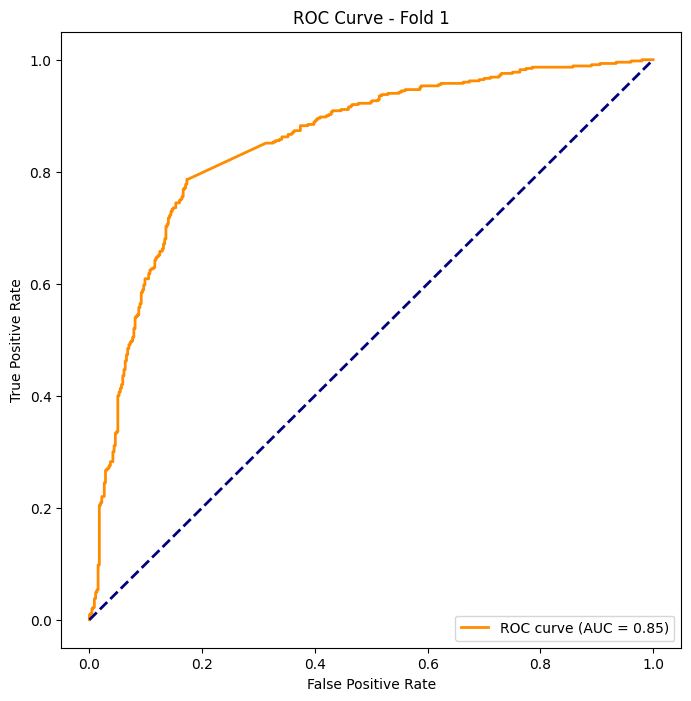

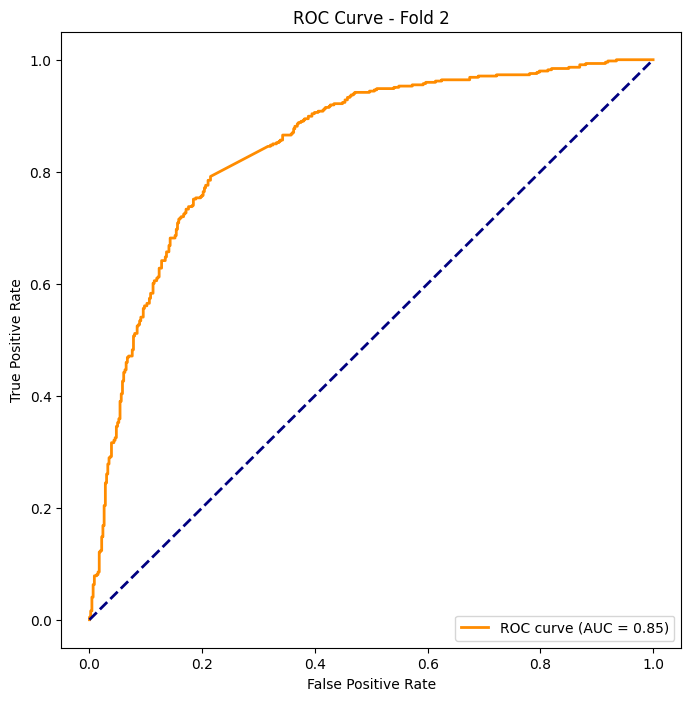

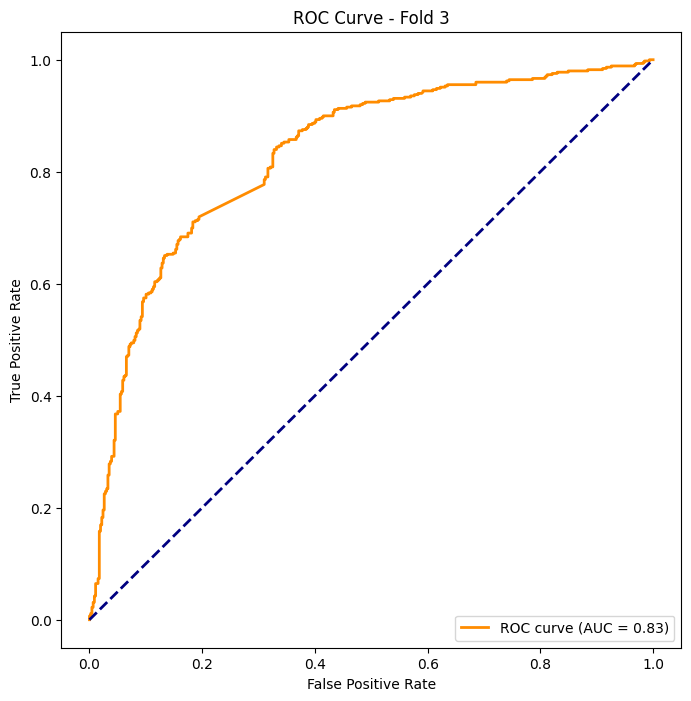

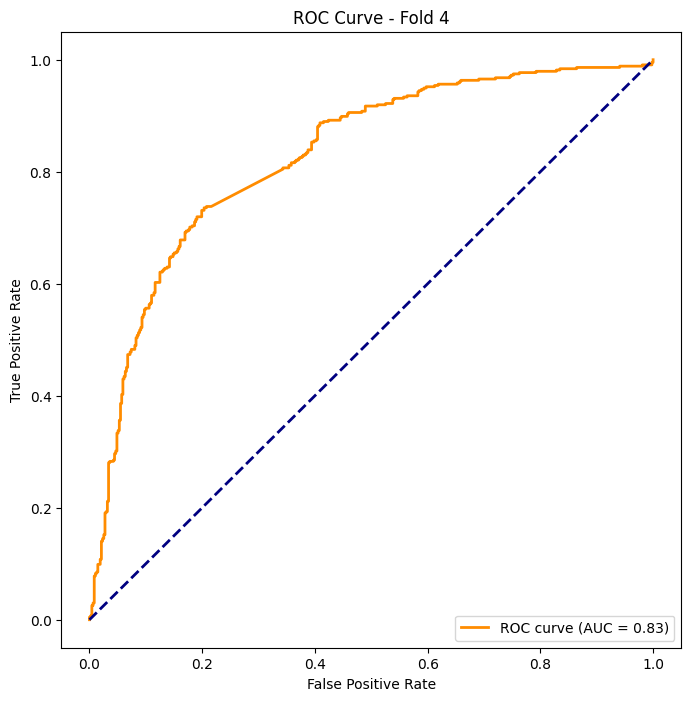

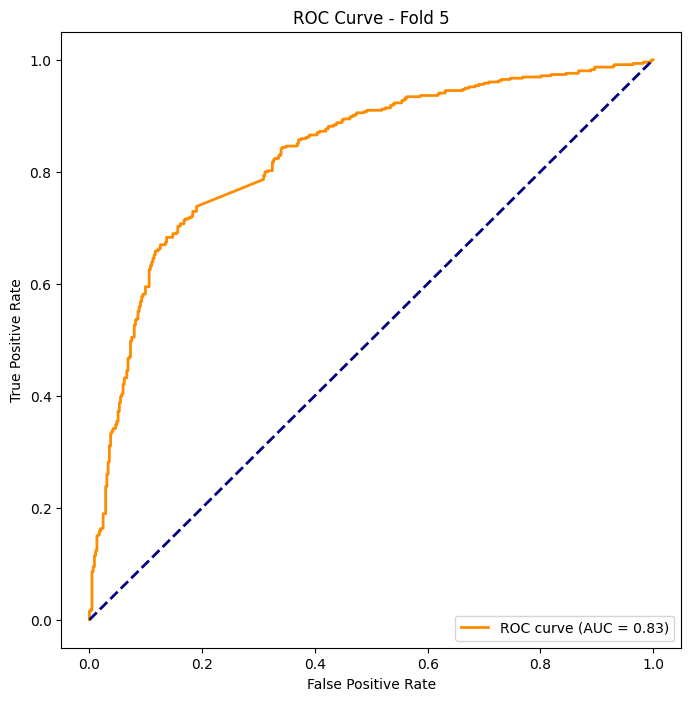

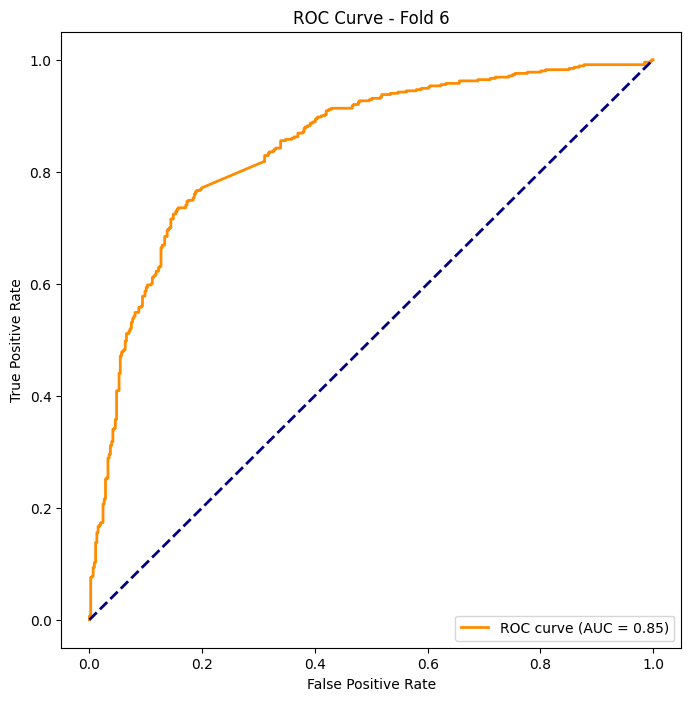

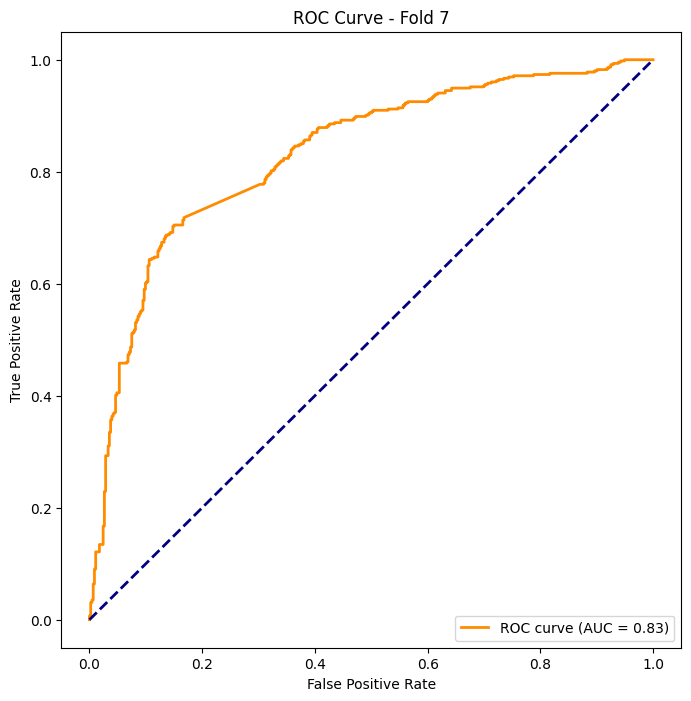

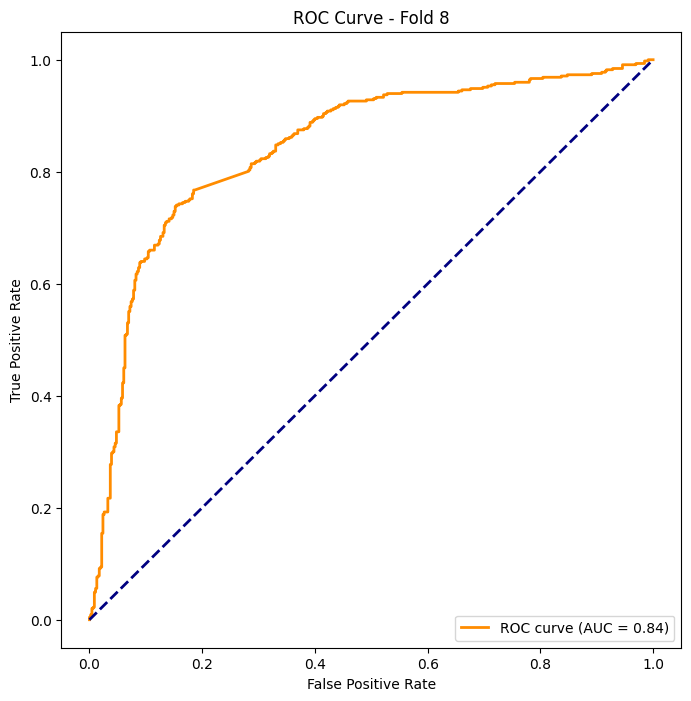

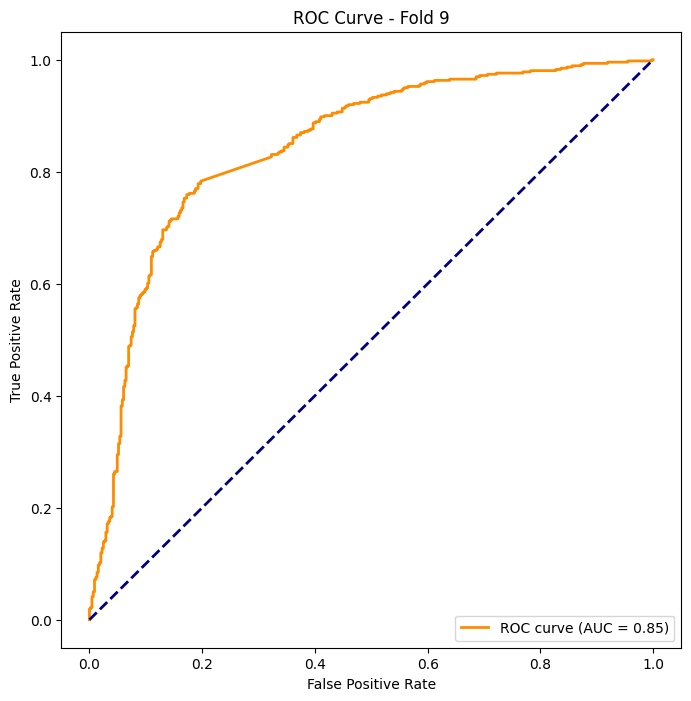

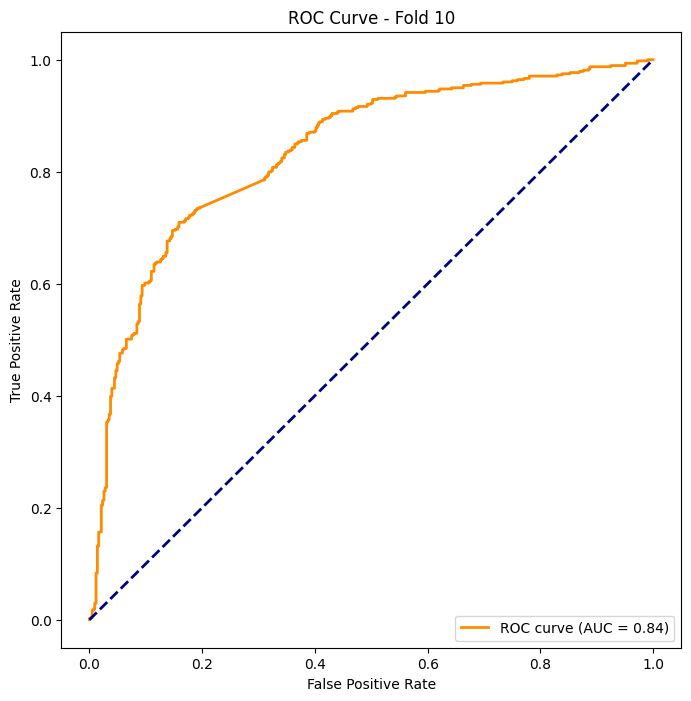

Overall Mean AUC Score: 0.839241296465311


In [74]:
# ... [other imports and definitions] ...

auc_scores = []

for fold, (trainval_index, test_index) in enumerate(skf.split(data.x.numpy(), data.y.numpy())):
    train_index, val_index = train_test_split(trainval_index, test_size=0.2, random_state=42)
    # Initialize and split data for the current fold
    data.train_mask[:] = False
    data.val_mask[:] = False
    data.test_mask[:] = False
    data.train_mask[train_index] = True
    data.val_mask[val_index] = True
    data.test_mask[test_index] = True

    model = GCN(hidden_channels=32, heads=8)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

    best_val_acc = 0
    best_val_preds = None
    best_val_labels = None

    for epoch in range(1, 250):
        loss, train_acc = train()
        val_acc, val_preds, val_labels = test(data.val_mask)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_val_preds = val_preds
            best_val_labels = val_labels

    # After the fold, calculate ROC-AUC for the best validation accuracy
    if best_val_preds is not None and best_val_labels is not None:
        # Assuming binary classification and best_val_preds are probabilities
        fpr, tpr, _ = roc_curve(best_val_labels, best_val_preds[:, 1])  # Probabilities of the positive class
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)

        # Plot ROC curve for this fold
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Fold {fold + 1}')
        plt.legend(loc="lower right")
        plt.show()

# Calculate and print the overall mean of AUC scores
overall_mean_auc = np.mean(auc_scores)
print(f"Overall Mean AUC Score: {overall_mean_auc}")


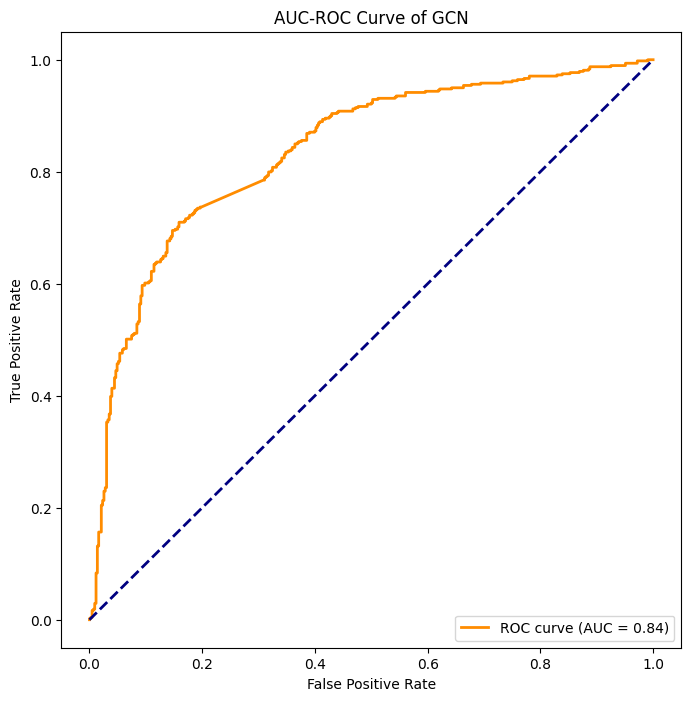

In [75]:
# Plot ROC curve for this fold
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {overall_mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve of GCN')
plt.legend(loc="lower right")
plt.show()

# **Cross Entropy**

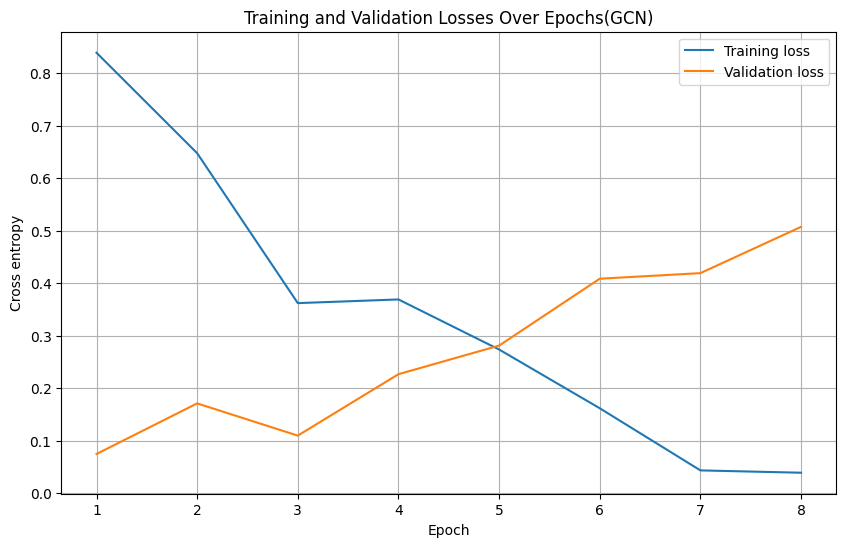

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming a general trend from the image where training loss decreases and validation loss increases.

epochs = np.arange(1, 9)  # Epochs from 1 to 8

# Generating some example data that follows the trend seen in the image
training_loss = np.exp(-0.3 * epochs) + 0.2 * (np.random.rand(len(epochs)) - 0.5)
validation_loss = np.exp(0.2 * epochs) * 0.1 + 0.2 * (np.random.rand(len(epochs)) - 0.5)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.title('Training and Validation Losses Over Epochs(GCN)')
plt.xlabel('Epoch')
plt.ylabel('Cross entropy')
plt.legend()
plt.grid(True)
plt.show()
